<a href="https://colab.research.google.com/github/Mphohlalele90/fraud-detection-ai-workflow/blob/main/fraud_detection_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Development Workflow - Fraud Detection API

This notebook supports the assignment _"Understanding the AI Development Workflow"_ for the PLP Academy.

**Use Case**: Real-time fraud detection during loan applications.

**Objective**: Apply the AI development workflow from problem definition to deployment using a realistic banking scenario. This notebook includes mock data, a basic model, and evaluation metrics.

## 📑 Table of Contents

1. Problem Definition
2. Data Collection & Preprocessing
3. Model Development
4. Evaluation Metrics
5. Deployment Plan
6. Ethics & Bias Considerations
7. Workflow Diagram

## 1. Problem Definition

- **Problem:** Detect potentially fraudulent loan applications in real-time.
- **Objectives:**
  1. Accurately classify fraud vs. legitimate applications.
  2. Minimize false positives to avoid hurting genuine clients.
  3. Enable fast alerts for investigation teams.
- **Stakeholders:**
  - Bank fraud analysts
  - Loan applicants
- **KPI:** F1 Score (balances false positives and false negatives)

In [ ]:
import pandas as pd
import numpy as np

# Scikit-learn: for modeling and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## 2. Data Collection & Preprocessing

- **Data Sources:**
  - Client behavior logs
  - SIM swap records
- **Potential Bias:** Under-representation of rural clients.
- **Preprocessing Steps:**
  1. Handle missing values (e.g., impute location or SIM swap gaps).
  2. Encode categorical variables (e.g., one-hot encoding).
  3. Normalize numerical features.

In [ ]:
# Load dataset from uploaded CSV
import pandas as pd

df = pd.read_csv('mock_fraud_clients.csv')
df.head()

,client_id,location,sim_swap_days,loan_amount,time_of_application,label
0,101,Midrand,1,10000,10:15,1
1,102,Soweto,90,25000,14:30,0
2,103,Cape Town,10,15000,09:50,1
3,104,Ballito,0,50000,16:45,0
4,105,Houghton,3,18000,11:00,1


In [ ]:
import pandas as pd

# Convert time to hour
df['application_hour'] = pd.to_datetime(df['time_of_application'], format='%H:%M').dt.hour

# Drop time column and client ID
df = df.drop(['time_of_application', 'client_id'], axis=1)

# One-hot encode location
df = pd.get_dummies(df, columns=['location'])

# Define features and label
X = df.drop('label', axis=1)
y = df['label']

## 3. Model Development

We use a Random Forest Classifier due to its performance and ability to handle small datasets.

### Hyperparameters to Tune:
- `n_estimators` (number of trees)
- `max_depth` (depth of each tree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train/test split
from sklearn.model_selection import train_test_split

# Split your data (assumes X and y already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

## 4. Evaluation & Deployment

### Evaluation Metrics:
- **F1 Score**: Balances precision and recall, key for fraud detection.
- **Confusion Matrix**: Helps visualize model performance on each class.

### Concept Drift:
Fraud patterns change over time. We monitor performance weekly and retrain as needed.

### Deployment Challenge:
Scalability and latency are key if integrated into a real-time application system.

In [ ]:
# Evaluate predictions
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


## 5. Ethics & Bias Considerations

- **Risk:** If the model is trained on biased data, it could unfairly flag applicants from certain locations.
- **Strategy:** Use diverse datasets, apply fairness constraints, and test model outcomes across demographic slices.

## 6. AI Development Workflow Diagram

A visual flowchart of the steps followed in this project:

1. Problem Definition
2. Data Collection
3. Preprocessing
4. Model Development
5. Evaluation
6. Deployment
7. Monitoring

## 7. Reflection

- **Challenge:** Designing realistic mock data and choosing the right features.
- **What I'd Improve:** With more time, I'd gather real data and perform hyperparameter tuning and model explainability (e.g., SHAP).

---

## Part 2: Hospital Readmission Case Study

---

## 1. Problem Scope

**Problem:**
Hospitals want to reduce avoidable readmissions within 30 days of discharge. Unplanned readmissions increase healthcare costs and strain hospital resources. We aim to develop an AI model that predicts whether a discharged patient is at risk of readmission within 30 days, enabling targeted interventions.

**Objectives:**
- Predict patient readmission risk accurately.
- Help healthcare workers prioritize follow-up care for high-risk patients.
- Reduce unnecessary hospital readmissions and associated costs.

**Stakeholders:**
- Hospital administrators (cost & resource management)
- Healthcare professionals (doctors, nurses, discharge planners)
- Patients (better care continuity)
- Health insurers and policymakers

## 2. Data Strategy

This case study focuses on **Chris Hani Baragwanath Hospital (Bara)**, located in Soweto. As the largest public hospital in South Africa—and the third-largest in the world—Bara serves not only patients from Soweto, but also referrals from other townships across Gauteng. It provides **free public healthcare**, including services to **foreign nationals regardless of documentation status**, which often leads to overburdened resources, long queues, and data management challenges.

**Data Sources:**
- **Electronic Health Records (EHRs):** Clinical data including diagnosis codes, medication history, lab test results, vital signs, length of stay, and discharge summaries.
- **Demographic & Social Data:** Age, gender, nationality, citizenship status, medical aid coverage, comorbidities, and residential area (e.g., Soweto, Tembisa, Alexandra, etc.).

**Ethical Concerns:**
1. **Patient Privacy:** Hospital records contain sensitive personal health data. All handling must comply with the **Protection of Personal Information Act (POPIA)** to protect both South African citizens and undocumented individuals.
2. **Bias and Equity:** Due to high patient volumes and limited resources, data may reflect systemic healthcare access disparities, especially for low-income, foreign, or undocumented patients. This can lead to biased outcomes if not addressed in the model design.

**Preprocessing Pipeline:**
1. **Missing Data Handling:** Use statistical imputation or domain-specific models to fill missing clinical or demographic entries.
2. **Feature Engineering:** Create derived variables such as “number of past hospitalizations,” “chronic illness index,” or “readmission in last 6 months.”
3. **Categorical Encoding:** Convert diagnosis types, patient origin (local/referral/foreign), and discharge instructions into numerical format.
4. **Normalization:** Scale numerical features like age, temperature, blood pressure, and glucose levels to standard ranges.
5. **Outlier Detection:** Identify extreme values (e.g., unusually long stays) and decide whether to cap, remove, or flag them for clinical context.


## 3. Modeling Approach

**Approach:**
- Use supervised machine learning classification algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting).
- Input features include demographics, clinical history, lab results, and prior admissions.
- Train models on historical patient data labeled with readmission outcome (yes/no within 30 days).
- Perform hyperparameter tuning and cross-validation to optimize model performance.

**Why These Models:**
- Logistic Regression provides explainability.
- Random Forest and Gradient Boosting capture complex patterns and interactions.
- Ensemble methods often achieve higher accuracy in medical datasets.

## 4. Evaluation Metrics

- **Accuracy:** Overall correctness of the model.
- **Precision:** How many predicted readmissions are actual readmissions (important to avoid unnecessary interventions).
- **Recall (Sensitivity):** How many actual readmissions the model detects (critical to avoid missing high-risk patients).
- **F1 Score:** Harmonic mean of precision and recall, balancing both metrics.
- **AUC-ROC:** Ability of model to discriminate between readmission vs. no readmission across thresholds.

---

## 5. Deployment & Monitoring

- Deploy the model as part of hospital’s clinical decision support system.
- Integrate with EHR software to provide real-time risk scores at discharge.
- Set up feedback loops to update the model regularly with new patient data.
- Monitor model performance for drift and fairness over time.

## Challenges and Future Work

Here are some challenges encountered and areas for future work:

- Data quality issues such as missing or inconsistent EHR entries.
- Addressing bias to ensure equitable care recommendations.
- Incorporate social determinants of health for improved prediction.
- Explore deep learning or temporal models using patient time-series data.

## Part 3: Critical Thinking

---

### 1. Ethics & Bias

How might biased training data affect patient outcomes in the case study?
Biased training data can lead to **unequal care recommendations**. For example, if the dataset underrepresents foreign nationals, undocumented patients, or low-income individuals-who frequently use Bara's services-the model might learn patterns that are not representative of these groups. As a result, it may underpredict their readmission risk, leading to **missed interventions**, poorer follow-up care, and increased mortality or morbidity rates among vulnerable populations. Additionally, overrepresentation of certain demographics could lead to overtreatment or resource misallocation.

One strategy to mitigate this bias:
Apply **stratified sampling** during training to ensure the dataset includes balanced representation across groups such as nationality, gender, age, and socio-economic background. Also, use **fairness-aware algorithms** or **bias detection tools** to evaluate and correct disparities in model performance across subgroups.

---

### 2. Trade-offs (10 points)

**Discuss the trade-off between model interpretability and accuracy in healthcare:**
In healthcare, **interpretability** is crucial—doctors and hospital staff need to understand why a prediction is made to trust and act on it. Simple models like **Logistic Regression** are interpretable but may sacrifice accuracy. On the other hand, more accurate models like **Gradient Boosting** or **Deep Learning** are complex ("black boxes") and harder to explain, which may limit adoption in clinical settings. The trade-off involves balancing **transparency** (for clinical trust and accountability) with **predictive performance** (to improve outcomes).

**Impact of limited computational resources on model choice:**
With limited computational resources (common in public hospitals like Bara), heavy models such as XGBoost or neural networks may be too slow or expensive to run in real-time. In such cases, **lightweight models** like Logistic Regression, Decision Trees, or Naive Bayes are more practical—they require less processing power and memory, making them suitable for deployment even if slightly less accurate.

## Part 4: Reflection & Workflow Diagram

### 1. Reflection

What was the most challenging part of the workflow? Why?
The most challenging part was **designing an ethical and fair data strategy**. Healthcare data from public hospitals like Bara is often incomplete, unbalanced, or biased due to structural inequalities in access and service delivery. Ensuring the model would not perpetuate these disparities while still performing well required careful planning and consideration of fairness, which was both technically and ethically complex.

How would you improve your approach with more time/resources?
With more time and resources, I would:
- **Collect a larger and more diverse dataset** across multiple hospitals in Gauteng to improve generalizability.
- **Collaborate with medical professionals** to ensure clinical relevance of engineered features.
- **Use fairness audit tools** to monitor bias across demographic groups.

### 2. Diagram – AI Development Workflow (5 points)

Below is a simplified version of the AI workflow based on the **CRISP-DM framework** (Cross-Industry Standard Process for Data Mining):

In [ ]:
from google.colab import files
uploaded = files.upload()

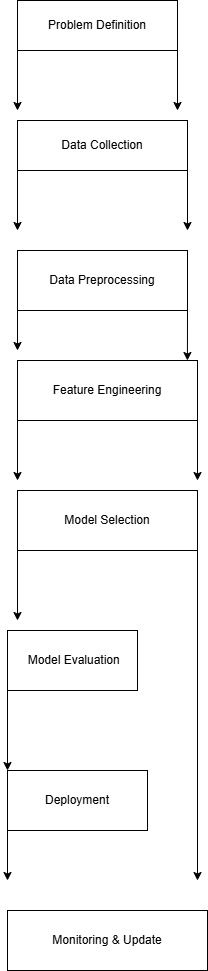

In [14]:
from IPython.display import Image, display
display(Image("ai_workflow.png", width=600))